In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Q:/Business Analytics/Data Science/Price Elasticity/trainingdata.csv')
df.shape

(40321, 634)

In [4]:
dfupc=df[df['upc'].isin(['306030535500'])]
dfupc.shape

(43, 634)

In [5]:
df2=dfupc[['saleamount','quantity','storesize','avgdiscount','privatelabel']]
df2.shape


(43, 5)

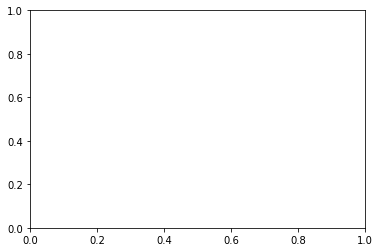

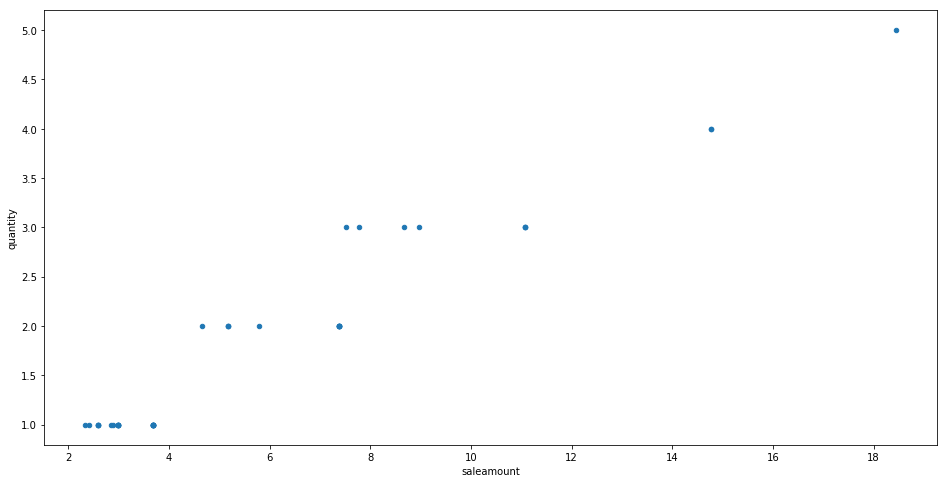

In [10]:
fig, axs = plt.subplots(sharey=True)
df2.plot(kind='scatter', x='saleamount', y='quantity', figsize=(16,8))






In [11]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='quantity ~ saleamount', data=df2).fit()

# print the coefficients
lm.params

Intercept     0.282929
saleamount    0.260564
dtype: float64

In [14]:
X_new = pd.DataFrame({'saleamount': [df2.saleamount.min(), df2.saleamount.max()]})
X_new.head()



,saleamount
0,2.33
1,18.45


In [15]:
preds = lm.predict (X_new)
preds

0    0.890043
1    5.090332
dtype: float64

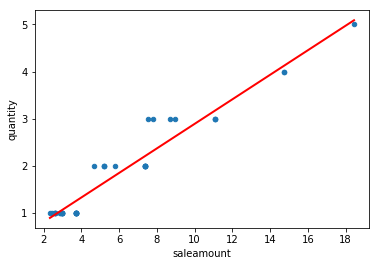

In [16]:
df2.plot(kind='scatter', x='saleamount', y='quantity')
plt.plot(X_new, preds, c='red', linewidth=2)


In [21]:
dfsmall = df2[df2['privatelabel'].isin(['Major Label'])]
dfsmall.shape

              

(43, 5)

In [1]:
pd.Series(df['upc']).value_counts()

NameError: name 'pd' is not defined

In [23]:
dfupc=df[df['upc'].isin(['17000026700'])]
dfupc.shape

(1309, 634)

In [24]:
pd.Series(dfupc['privatelabel']).value_counts()

Large      761
Medium     343
Small      187
Unknown     18
Name: storesize, dtype: int64

In [1]:
pd.Series(dfupc['privatelabeldesciption']).value_counts()


NameError: name 'pd' is not defined

In [34]:
# create three dummy variables using get_dummies, then exclude the first dummy column
storesize_dummies = pd.get_dummies(dfupc.storesize, prefix='storesize').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df2 = pd.concat([dfupc, storesize_dummies], axis=1)
df2.head()

,Unnamed: 0,datedimensionid,storeitemdimensionid,locationdimensionid,actualdate,upc,mfsfilenumber,storenumber,fyweekendingdateint,category,...,NAME,CompetitorsNearbyCount,CompetitorsAvgDriveTime,CompetitorsMinDriveTime,WalmartsNearbyCount,WalmartAvgDriveTime,WalmartMinDriveTime,storesize_Medium,storesize_Small,storesize_Unknown
2429,2429,20170205,1005207,333,2017-02-05,17000026700,1632,1632,20170205,Personal Care-Soaps,...,Sioux Falls #3,12,8.164458,3.070838,4.0,9.877826,6.947116,0,0,0
2430,2430,20170212,1005207,333,2017-02-12,17000026700,1632,1632,20170212,Personal Care-Soaps,...,Sioux Falls #3,12,8.164458,3.070838,4.0,9.877826,6.947116,0,0,0
2431,2431,20170219,1005207,333,2017-02-19,17000026700,1632,1632,20170219,Personal Care-Soaps,...,Sioux Falls #3,12,8.164458,3.070838,4.0,9.877826,6.947116,0,0,0
2432,2432,20170226,1005207,333,2017-02-26,17000026700,1632,1632,20170226,Personal Care-Soaps,...,Sioux Falls #3,12,8.164458,3.070838,4.0,9.877826,6.947116,0,0,0
2433,2433,20170312,1005207,333,2017-03-12,17000026700,1632,1632,20170312,Personal Care-Soaps,...,Sioux Falls #3,12,8.164458,3.070838,4.0,9.877826,6.947116,0,0,0


In [35]:
df2 = df2[['quantity','saleamount','avgdiscount','storesize','storesize_Medium','storesize_Small']]
df2.head()




,quantity,saleamount,avgdiscount,storesize,storesize_Medium,storesize_Small
2429,2.0,3.96,0.0,Large,0,0
2430,5.0,9.90,0.0,Large,0,0
2431,4.0,7.92,0.0,Large,0,0
2432,6.0,11.88,0.0,Large,0,0
2433,1.0,1.00,0.0,Large,0,0


In [45]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['saleamount', 'avgdiscount', 'storesize_Medium', 'storesize_Small']
X = df2[feature_cols]
y = df2.quantity

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

zip(feature_cols,lm.coef_)





-2.171580385956231
[ 0.96559965 -1.1295616   0.8813749   0.97033608]


In [46]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='quantity ~ storesize_Small', data=df2).fit()

# print the coefficients
lm.params

Intercept          7.588235
storesize_Small   -3.550802
dtype: float64

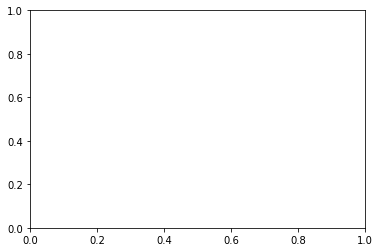

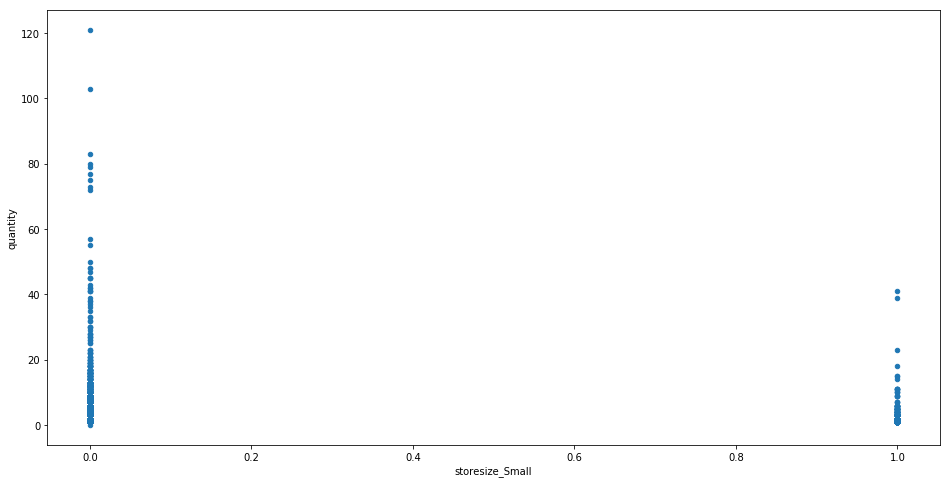

In [47]:
fig, axs = plt.subplots(sharey=True)
df2.plot(kind='scatter', x='storesize_Small', y='quantity', figsize=(16,8))